Thêm thư viện

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

Đọc và khai phá dữ liệu

In [67]:
train_df = pd.read_csv('train.csv')#'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
#'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
#Xem nhanh df.head(), df.info(), df.describe() để hiểu kiểu dữ liệu, số lượng bản ghi, missing value.

Xem qua dữ liệu tập train

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [69]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
train_df.dtypes[train_df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Text(0.5, 1.0, 'MSSubClass vs SalePrice')

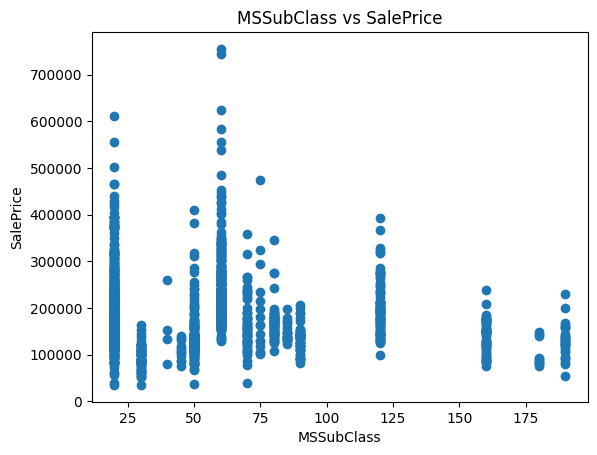

In [72]:
plt.scatter(x='MSSubClass',y='SalePrice',data=train_df)
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('MSSubClass vs SalePrice')

Text(0.5, 1.0, 'LotFrontage vs SalePrice')

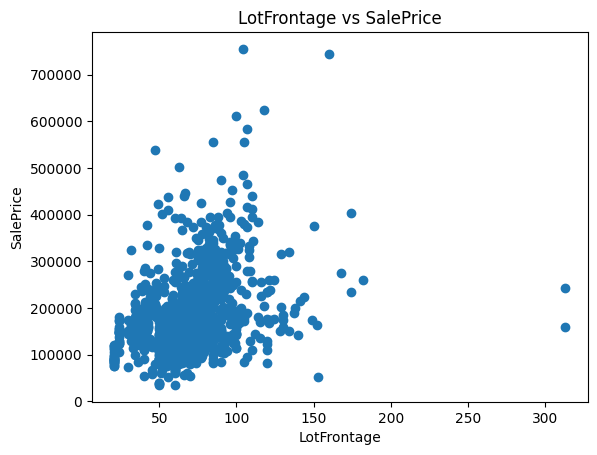

In [73]:
plt.scatter(x='LotFrontage',y='SalePrice',data=train_df)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('LotFrontage vs SalePrice')
#Trải khắp map

In [74]:
train_df.query('LotFrontage > 300')
#Bỏ outlier bỏ 935 ,1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Text(0.5, 1.0, 'LotArea vs SalePrice')

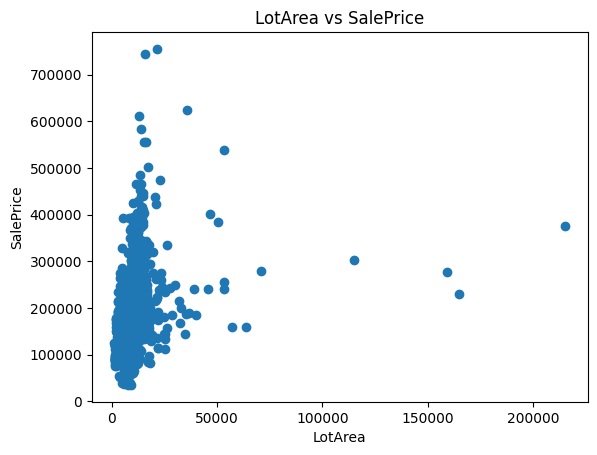

In [75]:
plt.scatter(x='LotArea',y='SalePrice',data=train_df)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs SalePrice')

In [76]:
train_df.query('LotArea > 50000+0.3/1.95*50000')#đo bằng thước
#Bỏ 250,314,336,707

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [77]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

Text(0.5, 1.0, 'OverallQual vs SalePrice')

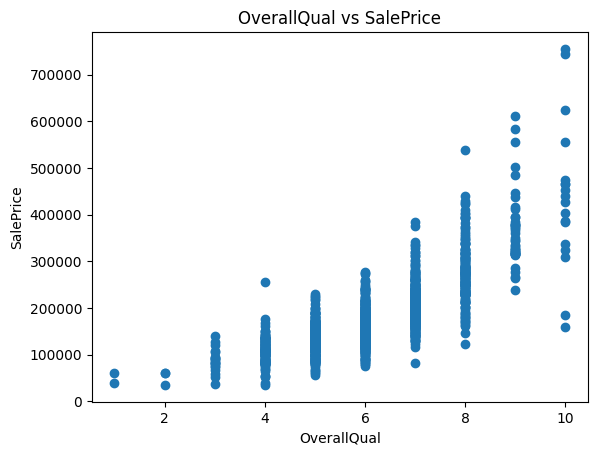

In [ ]:
plt.scatter(x='OverallQual',y='SalePrice',data=train_df)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice')

In [ ]:
train_df.query('OverallQual == 10')
#524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


Text(0.5, 1.0, 'OverallCond vs SalePrice')

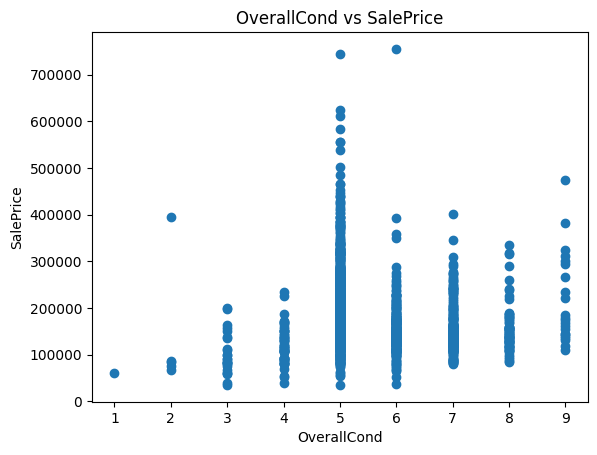

In [ ]:
plt.scatter(x='OverallCond',y='SalePrice',data=train_df)
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.title('OverallCond vs SalePrice')

In [ ]:
train_df.query('OverallCond == 2')
#Bỏ 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [ ]:
train_df.query('OverallCond == 5 & SalePrice > 700000')

#Bo 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [ ]:
train_df.query('OverallCond == 6 & SalePrice > 700000')
#Bo 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


Text(0.5, 1.0, 'YearBuilt vs SalePrice')

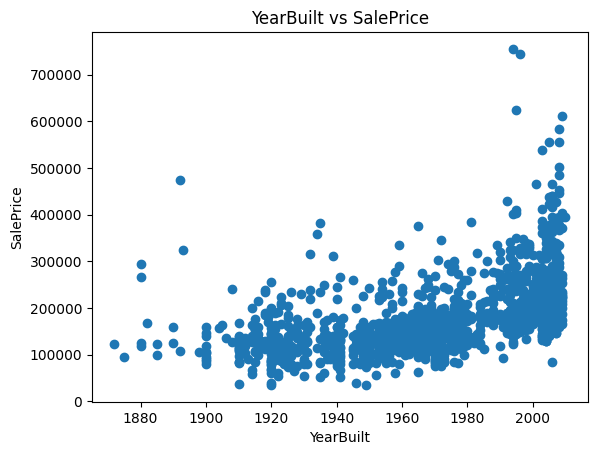

In [ ]:
plt.scatter(x='YearBuilt',y='SalePrice',data=train_df)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('YearBuilt vs SalePrice')

In [ ]:
train_df.query('YearBuilt < 1900 & SalePrice > 400000')
#Bo 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [ ]:
train_df.query('YearBuilt > 1900 & SalePrice > 600000')
#Bo 899,1170

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, 'YearRemodAdd vs SalePrice')

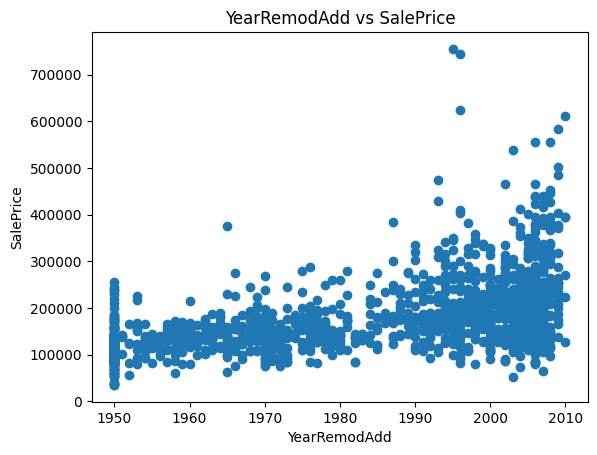

In [ ]:
plt.scatter(x='YearRemodAdd',y='SalePrice',data=train_df)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.title('YearRemodAdd vs SalePrice')

In [ ]:
train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#Bo 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


Text(0.5, 1.0, 'MasVnrArea vs SalePrice')

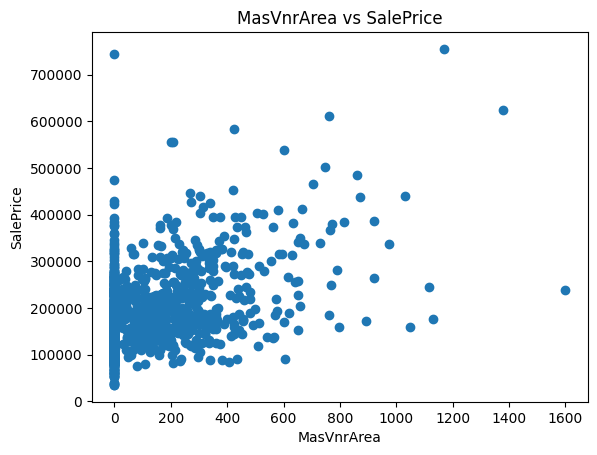

In [ ]:
plt.scatter(x='MasVnrArea',y='SalePrice',data=train_df)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.title('MasVnrArea vs SalePrice')

In [ ]:
train_df.query('MasVnrArea == 0 & SalePrice > 500000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [ ]:
train_df.query('MasVnrArea > 1400 ')
#Bo 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


Text(0.5, 1.0, 'BsmtFinSF1 vs SalePrice')

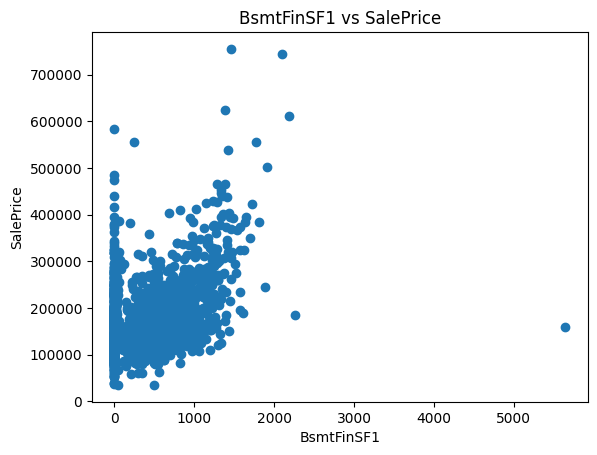

In [ ]:
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=train_df)
plt.xlabel('BsmtFinSF1')
plt.ylabel('SalePrice')
plt.title('BsmtFinSF1 vs SalePrice')

In [ ]:
train_df.query('BsmtFinSF1 > 5000 ')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
train_df.query('BsmtFinSF1 > 1000 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, 'BsmtFinSF2 vs SalePrice')

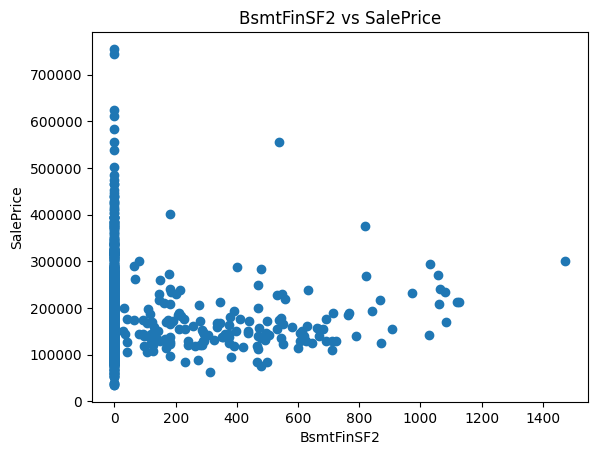

In [ ]:
plt.scatter(x='BsmtFinSF2',y='SalePrice',data=train_df)
plt.xlabel('BsmtFinSF2')
plt.ylabel('SalePrice')
plt.title('BsmtFinSF2 vs SalePrice')

In [ ]:
train_df.query('BsmtFinSF2 > 1400')
#Bo 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [ ]:
train_df.query('BsmtFinSF2 > 200 & SalePrice > 500000')
#Bo 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


Text(0.5, 1.0, 'BsmtUnfSF vs SalePrice')

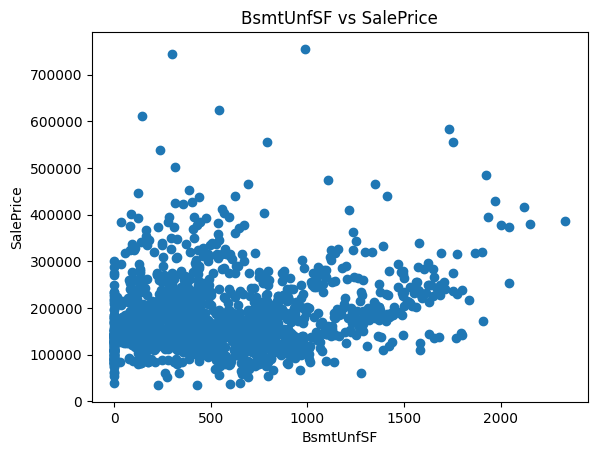

In [ ]:
plt.scatter(x='BsmtUnfSF',y='SalePrice',data=train_df)
plt.xlabel('BsmtUnfSF')
plt.ylabel('SalePrice')
plt.title('BsmtUnfSF vs SalePrice')

In [ ]:
train_df.query('BsmtUnfSF > 200 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, 'TotalBsmtSF vs SalePrice')

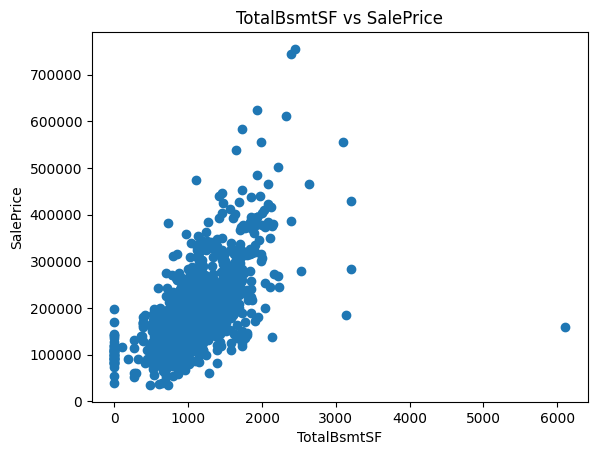

In [ ]:
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=train_df)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('TotalBsmtSF vs SalePrice')

In [ ]:
train_df.query('TotalBsmtSF > 5000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
train_df.query('TotalBsmtSF > 2000 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, '1stFlrSF vs SalePrice')

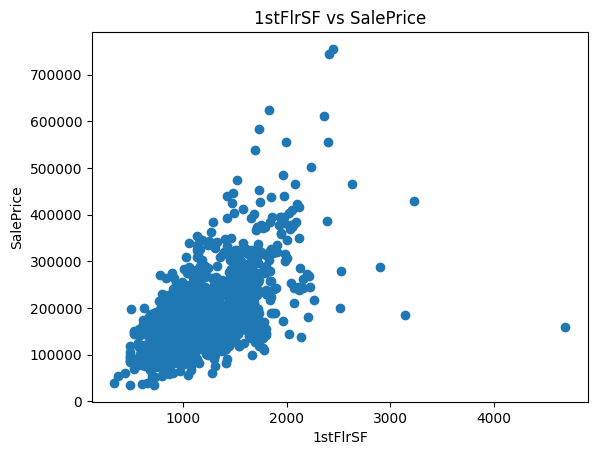

In [ ]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('1stFlrSF vs SalePrice')

In [ ]:
train_df.query('`1stFlrSF` > 2000 & SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, '2ndFlrSF vs SalePrice')

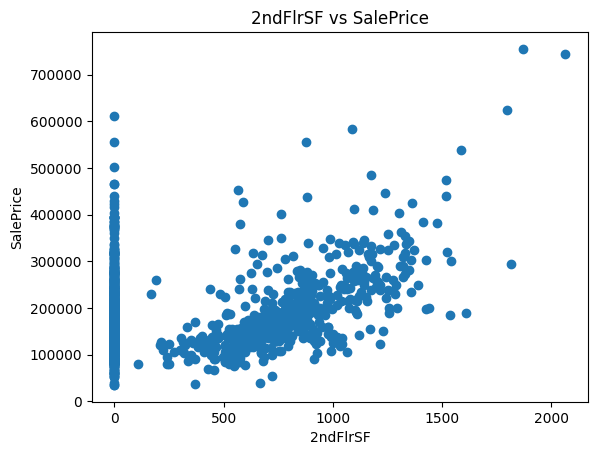

In [ ]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')
plt.title('2ndFlrSF vs SalePrice')

In [ ]:
train_df.query('`2ndFlrSF` > 2000 ')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, 'LowQualFinSF vs SalePrice')

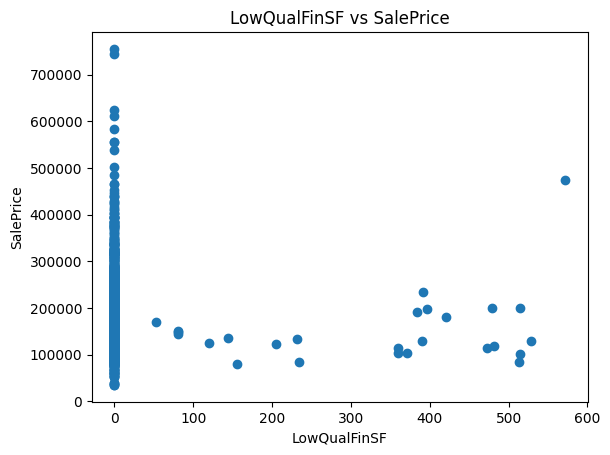

In [ ]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)
plt.xlabel('LowQualFinSF')
plt.ylabel('SalePrice')
plt.title('LowQualFinSF vs SalePrice')

In [ ]:
train_df.query('LowQualFinSF > 500 & SalePrice > 300000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


Text(0.5, 1.0, 'GrLivArea vs SalePrice')

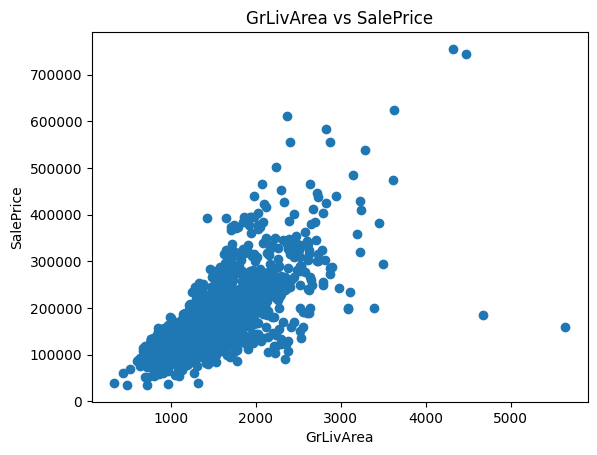

In [ ]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')

In [ ]:
train_df.query('GrLivArea > 4500 ')
#Bo 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Text(0.5, 1.0, 'BsmtFullBath vs SalePrice')

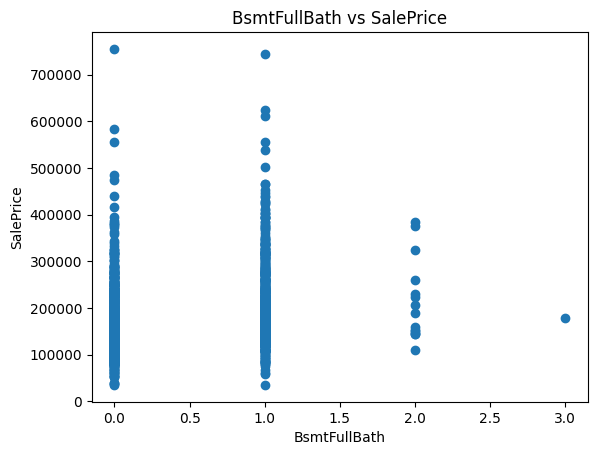

In [ ]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)
plt.xlabel('BsmtFullBath')
plt.ylabel('SalePrice')
plt.title('BsmtFullBath vs SalePrice')

In [ ]:
train_df.query('BsmtFullBath > 2.5')
#Bo 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [ ]:
train_df.query(' SalePrice > 700000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


Text(0.5, 1.0, 'BsmtHalfBath vs SalePrice')

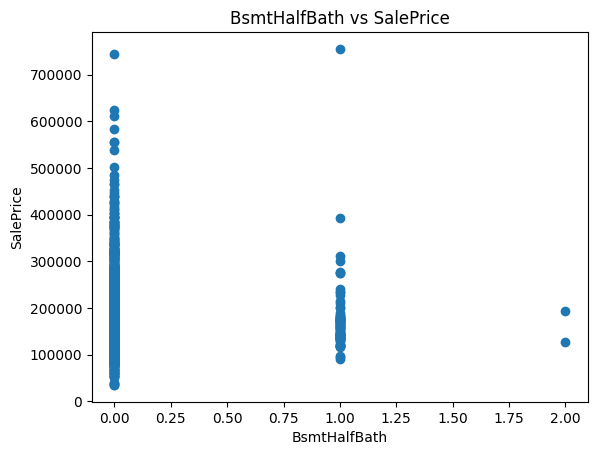

In [ ]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)
plt.xlabel('BsmtHalfBath')
plt.ylabel('SalePrice')
plt.title('BsmtHalfBath vs SalePrice')


In [ ]:
train_df.query('BsmtHalfBath == 2')
#Bo 598,955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


Text(0.5, 1.0, 'FullBath vs SalePrice')

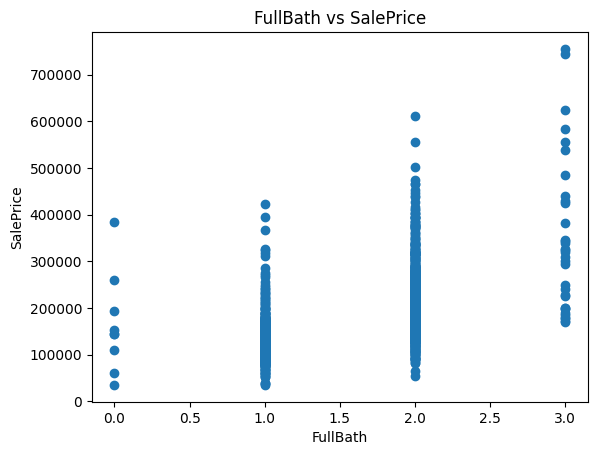

In [ ]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.title('FullBath vs SalePrice')

Text(0.5, 1.0, 'HalfBath vs SalePrice')

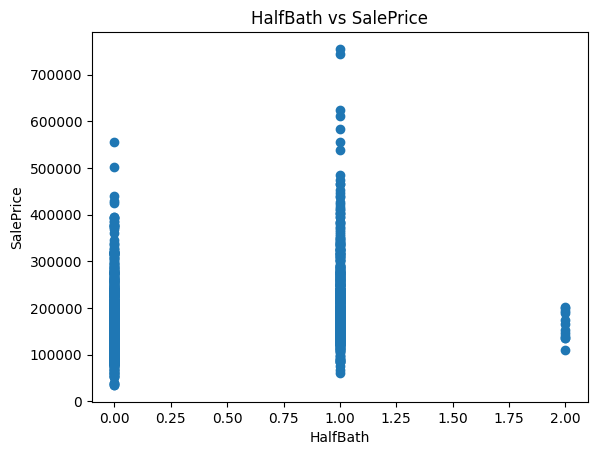

In [ ]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)
plt.xlabel('HalfBath')
plt.ylabel('SalePrice')
plt.title('HalfBath vs SalePrice')

Text(0.5, 1.0, 'BedroomAbvGr vs SalePrice')

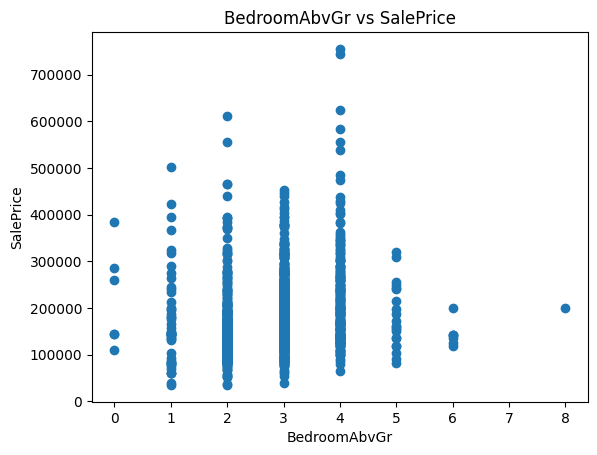

In [ ]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.title('BedroomAbvGr vs SalePrice')

In [ ]:
train_df.query('BedroomAbvGr > 7')
#Bo 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


Text(0.5, 1.0, 'KitchenAbvGr vs SalePrice')

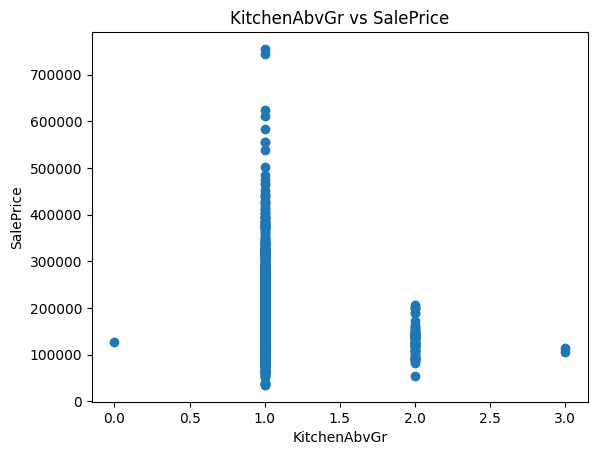

In [ ]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')
plt.title('KitchenAbvGr vs SalePrice')

In [ ]:
train_df.query('KitchenAbvGr == 3| KitchenAbvGr == 0')
#Bo 49,810,955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

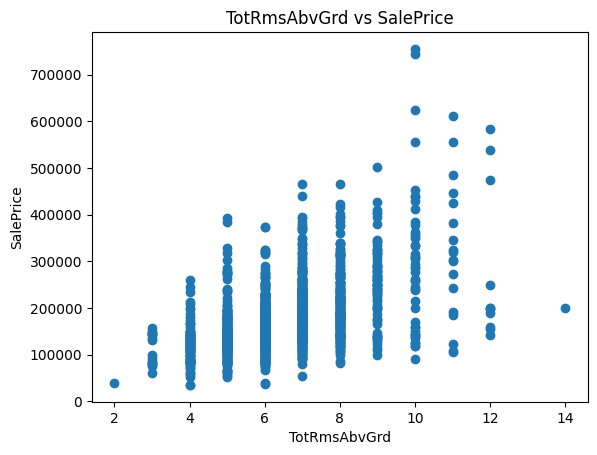

In [ ]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title('TotRmsAbvGrd vs SalePrice')

In [ ]:
train_df.query('TotRmsAbvGrd == 14')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


Text(0.5, 1.0, 'Fireplaces vs SalePrice')

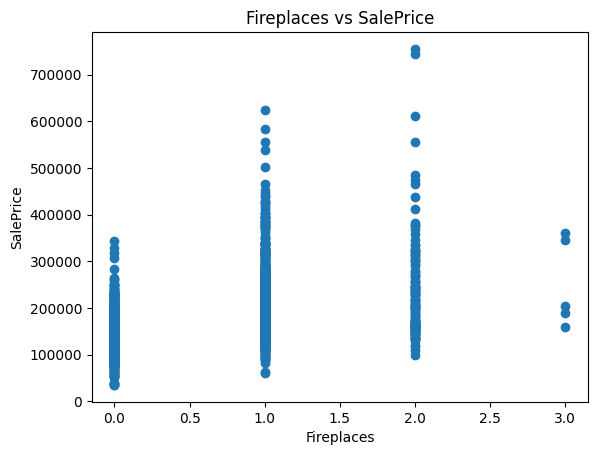

In [ ]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)
plt.xlabel('Fireplaces')
plt.ylabel('SalePrice')
plt.title('Fireplaces vs SalePrice')

Text(0.5, 1.0, 'GarageYrBlt vs SalePrice')

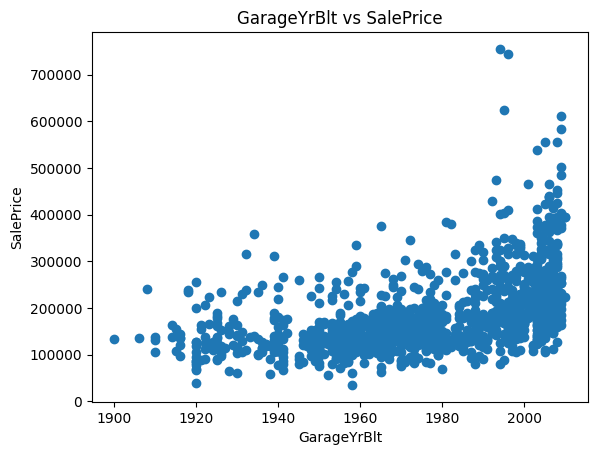

In [ ]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)
plt.xlabel('GarageYrBlt')
plt.ylabel('SalePrice')
plt.title('GarageYrBlt vs SalePrice')


Text(0.5, 1.0, 'GarageCars vs SalePrice')

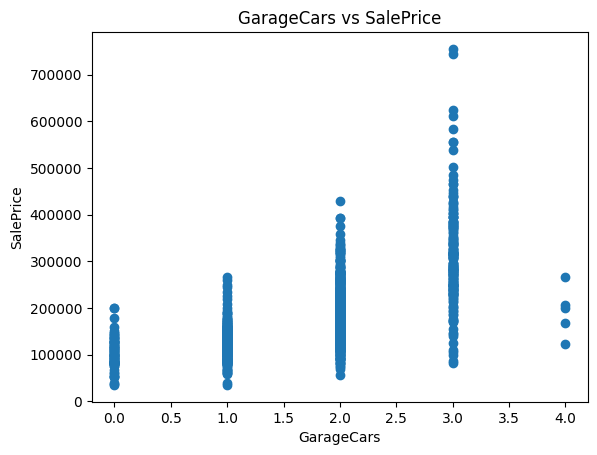

In [ ]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('GarageCars vs SalePrice')

Text(0.5, 1.0, 'GarageArea vs SalePrice')

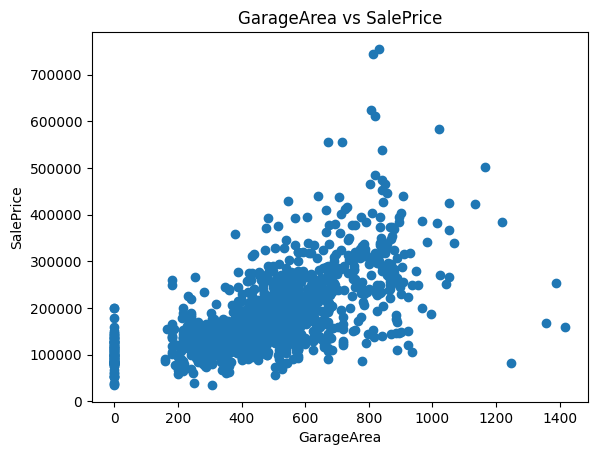

In [ ]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GarageArea vs SalePrice')

In [ ]:
train_df.query('GarageArea > 1230')
#Bo 1062,1191
#582

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Text(0.5, 1.0, 'WoodDeckSF vs SalePrice')

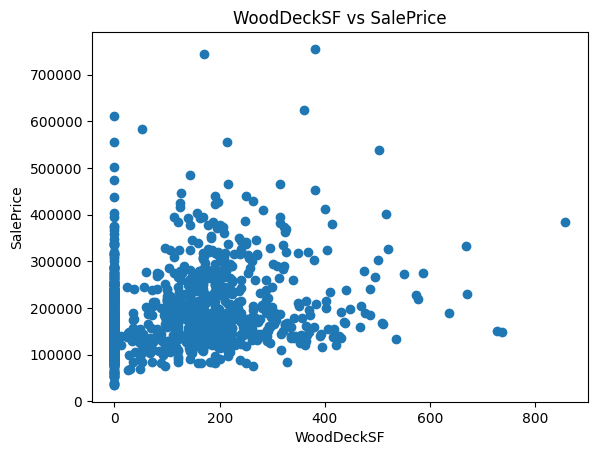

In [ ]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')
plt.title('WoodDeckSF vs SalePrice')

Text(0.5, 1.0, 'OpenPorchSF vs SalePrice')

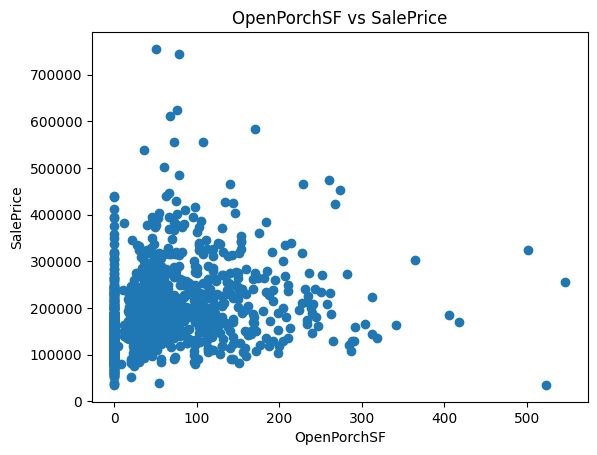

In [ ]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)
plt.xlabel('OpenPorchSF')
plt.ylabel('SalePrice')
plt.title('OpenPorchSF vs SalePrice')

In [ ]:
train_df.query('OpenPorchSF > 500')
#Bo 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


Text(0.5, 1.0, 'EnclosedPorch vs SalePrice')

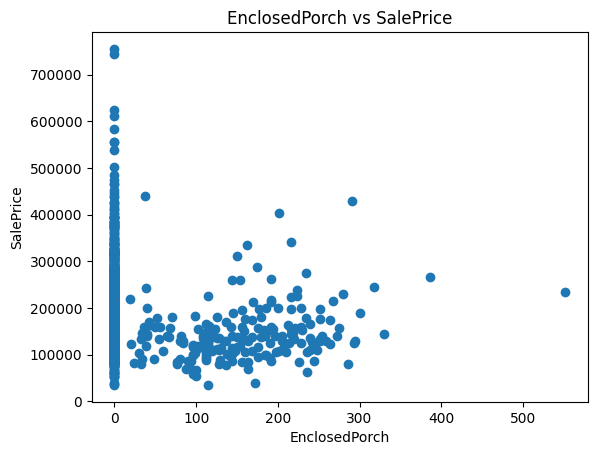

In [78]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)
plt.xlabel('EnclosedPorch')
plt.ylabel('SalePrice')
plt.title('EnclosedPorch vs SalePrice')

In [79]:
train_df.query('EnclosedPorch > 500')
#Bo 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


Text(0.5, 1.0, '3SsnPorch vs SalePrice')

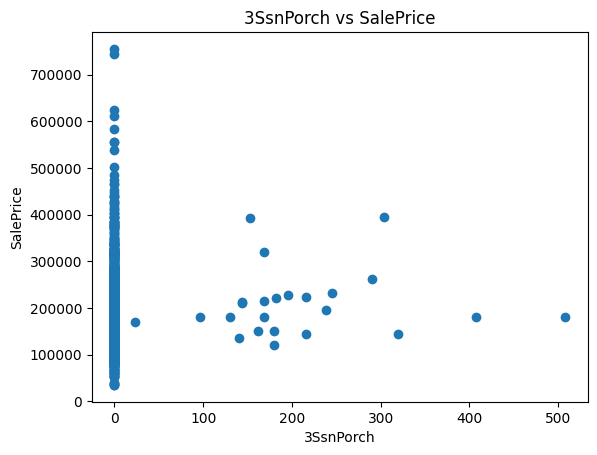

In [80]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)
plt.xlabel('3SsnPorch')
plt.ylabel('SalePrice')
plt.title('3SsnPorch vs SalePrice')

Xử lí dữ liệu chữ.

Phân loại biến bằng cách kiểm  tra dữ liệu trong train_df.

In [83]:
#Xác định danh sách các cột có kiểu object - thường là dữ liệu dạng chữ - categorical.
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [84]:
#Xác định danh sách các cột không phải dạng chữ.
train_df.dtypes[train_df.dtypes !='object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Chia nhóm biến để xử lí khác nhau, gồm 3 loại: 

Biến có thứ tự(Ordinal)

In [85]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

Biến không có thứ tự (Nominal)

In [87]:
ohe_cols = ['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
            'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical',
            'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

Biến số (Numerical)

In [88]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')
#Lấy tất cả các biến số (int/float), trừ SalePrice (vì nó là biến mục tiêu).

Tạo đường ổng(pipeline) để xử lí từng nhóm biến.

Pipeline xử lý biến số:

In [89]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Pipeline xử lý biến ordinal (thứ tự):

In [90]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


Pipeline xử lý biến nominal (không thứ tự):

In [91]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

Gộp các pipeline lại để áp dụng lên train_df, mỗi loại biến sẽ được xử lý theo pipeline riêng.
Các cột không có trong 3 nhóm trên sẽ giữ nguyên

In [92]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
], remainder='passthrough', n_jobs=-1)

Sau khi đã gộp 3 pipeline, gộp chúng vào pipeline chính - pipeline cuối cùng xử lí toàn bộ dữ liệu:

In [93]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

Xử lí các giá trị ngoại lệ.

In [ ]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]
# Một số giá trị.

In [ ]:
train_df = train_df[train_df.Id.isin(values) == False]

Tìm kiếm các giá trị thiếu(NaN), sắp xếp các cột theo số lượng giá trị thiếu từ nhiều nhất đến ít nhất, giới hạn 20 hàng đầu.

In [ ]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageQual,76
GarageFinish,76
GarageType,76


Kiểm tra các giá trị hiện có(ngoài giá trị thiếu ra) trong các cột có nhiều giá trị thiếu, ví dụ xét với MiscFeature và Alley(Cột PoolQC có hầu hết các giá trị là giá trị thiếu nên không xét đến).

In [ ]:
train_df['MiscFeature'].unique()
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

Xử lí giá trị thiếu:
Thay thế các giá trị thiếu (nan) trong cột Alley(Hẻm) thành 'No', nghĩa là ngôi nhà đang xét không có các đặc điểm tương ứng.

In [ ]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2277165759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2277165759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Vẽ biểu đồ hộp xem xét mối quan hệ giữa Alley với SalePrice.

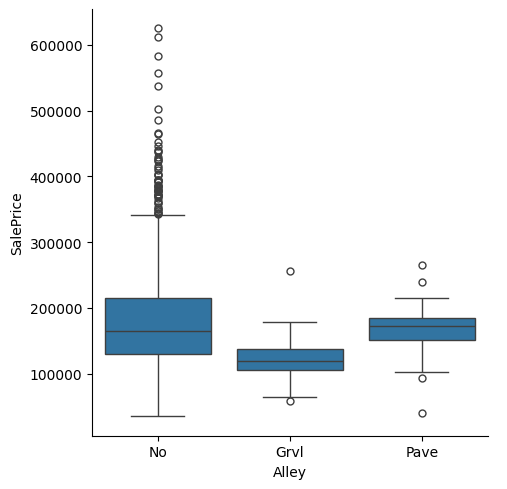

In [ ]:
sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

Xử lý tương tự với các dữ liệu tiếp theo.

Xử lí cột Fence(Chất lượng hàng rào).

In [ ]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
train_df['Fence'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1182502878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No', inplace=True)


In [ ]:
test_df['Fence'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\323599857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fence'].fillna('No', inplace=True)


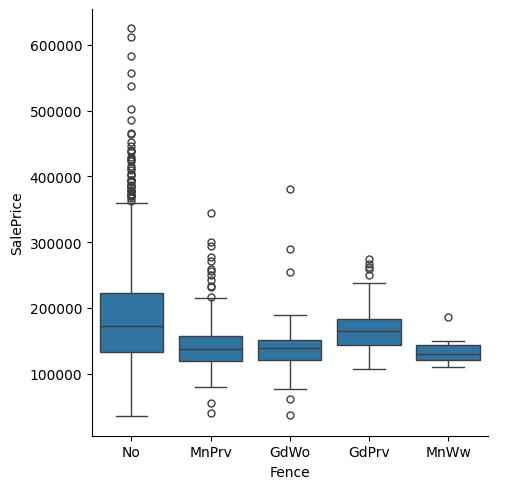

In [ ]:
sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

Xử lí cột MasVnrType(loại vật liệu ốp mặt ngoài/mặt tiền).

In [ ]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'No', 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

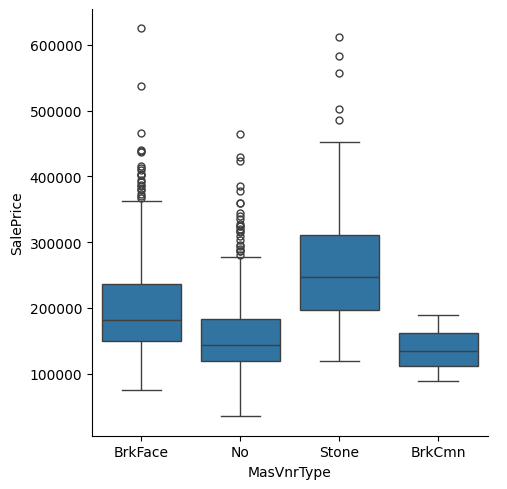

In [ ]:
sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

Xử lý dữ liệu cột MarVnrArea(Diện tích tính bằng feet vuông của phần mặt ngoài ngôi nhà được ốp bằng vật liệu xây như gạch hoặc đá (masonry veneer))

In [ ]:
#Thay các giá trị thiếu thành 0. 
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1128166068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1128166068.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Xử lý dữ liệu cột FireplaceQu(Chất lượng lò sưởi trong căn nhà.)

In [ ]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2825947256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2825947256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

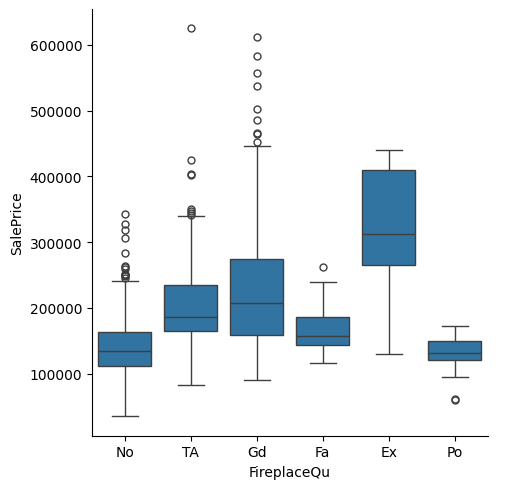

In [ ]:
sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

Xử lý dữ liệu cột Fireplaces(Số lượng lò sưởi trong ngôi nhà).

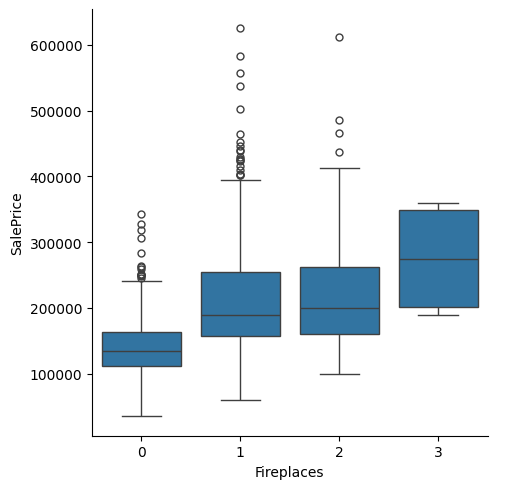

In [ ]:
sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

Xử lý dữ liệu cột LotFrontage(Chiều dài mặt tiền lô đất).

In [ ]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1334701034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1334701034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Xem xét năm xây dựng nhà để xe với năm xây dựng nhà(Không cần thiết lắm).

In [ ]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

np.float64(0.8289827595060573)

Kết quả trả về có giá trị gần 1, điều đó chứng tỏ rằng khi ngôi nhà được xây dựng vào năm nào, thì gara cũng được xây dựng vào năm tương tự. Điều này có thể dùng để xem xét nếu 1 trong 2 yếu tố có giá trị thiếu thì có thể tham khảo yếu tố còn lại để xác định.

Tiếp tục xử lí dữ liệu ngoại lai.
Xử lý dữ liệu cột GarageCond(Tình trạng tổng thể của gara).

In [ ]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1255948083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1255948083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

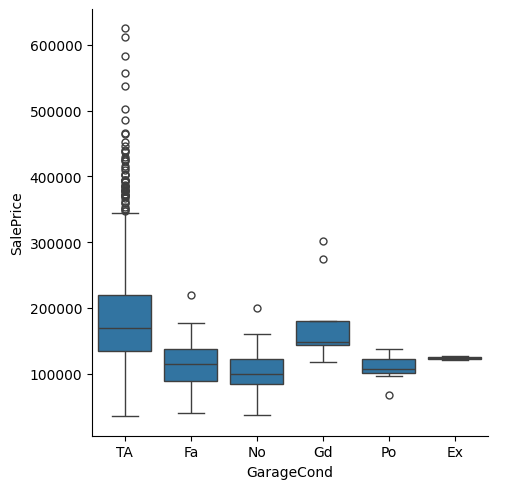

In [ ]:
sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

Xử lý dữ liệu cột GarageType(Vị trí hoặc kiểu gara so với ngôi nhà).

In [ ]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\3721453499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\3721453499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

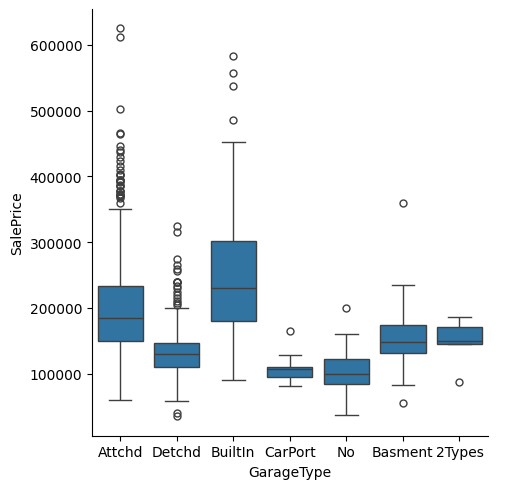

In [ ]:
sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

Xử lý dữ liệu cột GarageFinish(Mức độ hoàn thiện bên trong gara).

In [ ]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2912414829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2912414829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

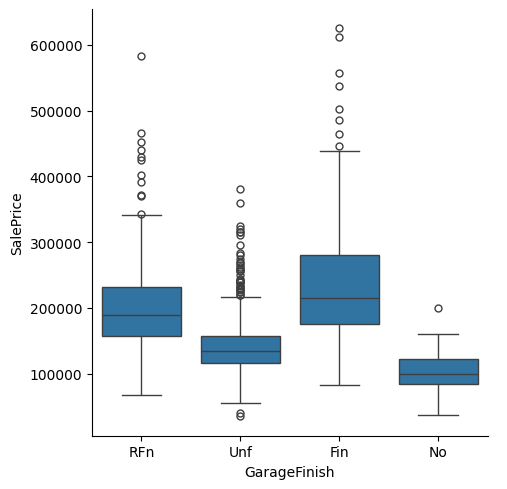

In [ ]:
sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

Xử lý dữ liệu cột GarageQual(Chất lượng tổng thể của gara)

In [ ]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\94532614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageQual'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\94532614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

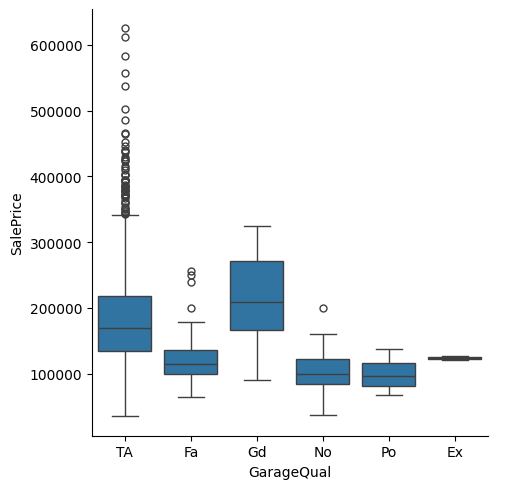

In [ ]:
sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

Xử lý dữ liệu cột BsmtFinType2(Loại hoàn thiện tầng hầm thứ hai nếu có).

In [ ]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1071294587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType2'].fillna('Unf', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\1071294587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

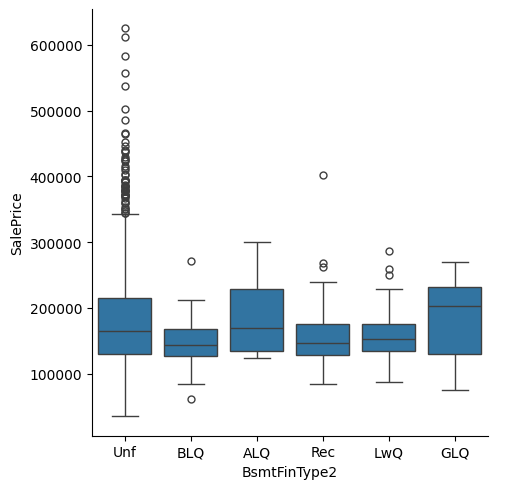

In [ ]:
sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

Xử lý dữ liệu cột BsmtExposure(Mức độ tiếp xúc của tầng hầm — mô tả mức độ của tầng hầm tiếp xúc với không gian ngoài trời thông qua cửa sổ hoặc cửa ra vào).

In [ ]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2040818772.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtExposure'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2040818772.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

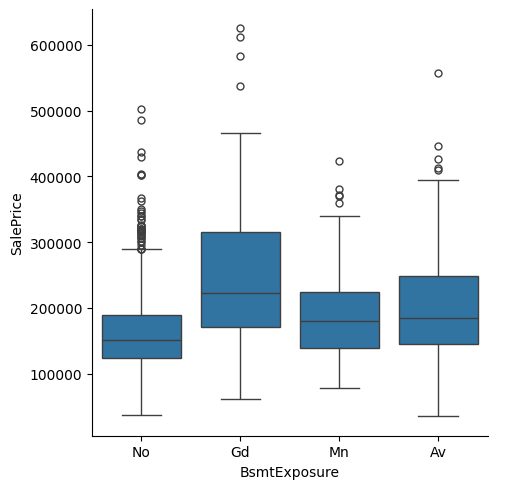

In [ ]:
sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

Xử lý dữ liệu cột BsmtQual(Chất lượng của tầng hầm).

In [ ]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2878576625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtQual'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2878576625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

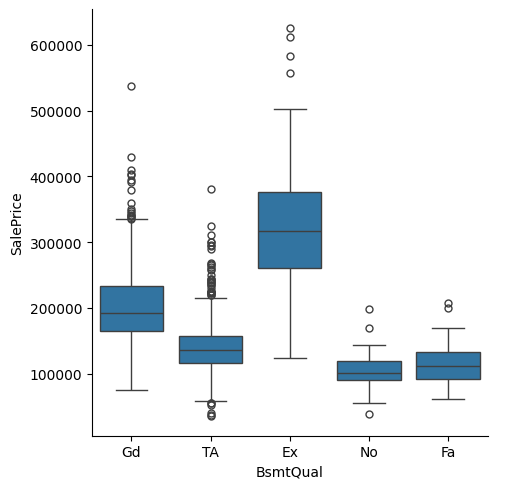

In [ ]:
sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

Xử lý dữ liệu cột BsmtCond(Tình trạng tổng thể của tầng hầm).

In [ ]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [ ]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2806626140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtCond'].fillna('No', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\2806626140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

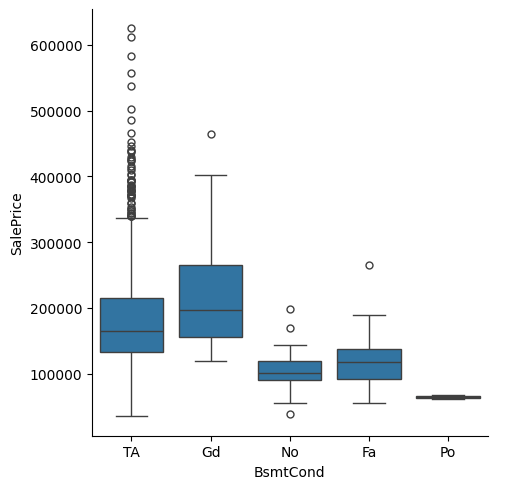

In [ ]:
sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

Xử lý dữ liệu cột BsmtFinType1(Loại hoàn thiện tầng hầm chính).

In [ ]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [ ]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\3531540711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['BsmtFinType1'].fillna('Unf', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\3531540711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

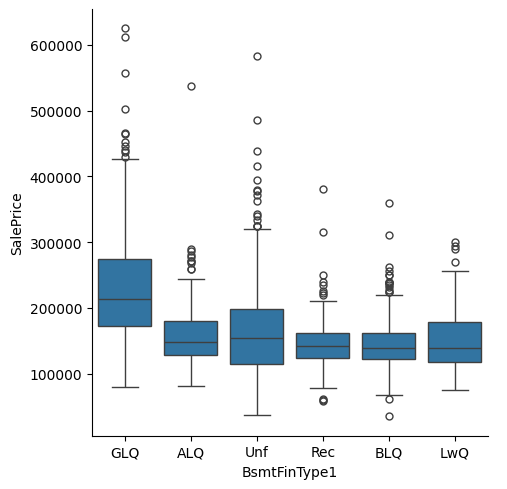

In [ ]:
sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")


Xử lý dữ liệu cột MasVnrArea(Diện tích bề mặt ốp tường bên ngoài ngôi nhà).

In [ ]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Xử lý dữ liệu cột Electrical(Hệ thống điện).

In [ ]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\4245203846.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Electrical'].fillna('SBrkr', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8068\4245203846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Loại bỏ các cột có giá trị thiếu cao hoặc không có ảnh hưởng lớn đến mô đun và có thể dễ thay thế.


In [ ]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

Tạo dữ liệu đặc trưng(feature engineering).

Tuổi đời của ngôi nhà(Năm bán - năm xây).

In [ ]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

Tuổi của ngôi nhà kể từ lần sửa chữa cuối cùng(Năm bán - năm sửa)

In [ ]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

Tổng diện tích sàn(Diện tích sàn tầng 1 + tầng 2 + tầng hầm).

In [ ]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

Tổng diện tích sử dụng(Diện tích sàn sống + diện tích tầng hầm).

In [ ]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

Tổng số phòng tắm(FullBath + BsmtFullBath)

In [ ]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

Tổng diện tích sân vườn và hiên(Hiên mở + hiên 3 mùa + hiên kín + hiên lưới + sân gỗ).

In [ ]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

Xóa các cột đã dùng để tạo dữ liệu đặc trưng.

In [ ]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

Tạo ma trận tương quan giữa các đặc trưng trong bộ dữ liệu.

<Axes: >

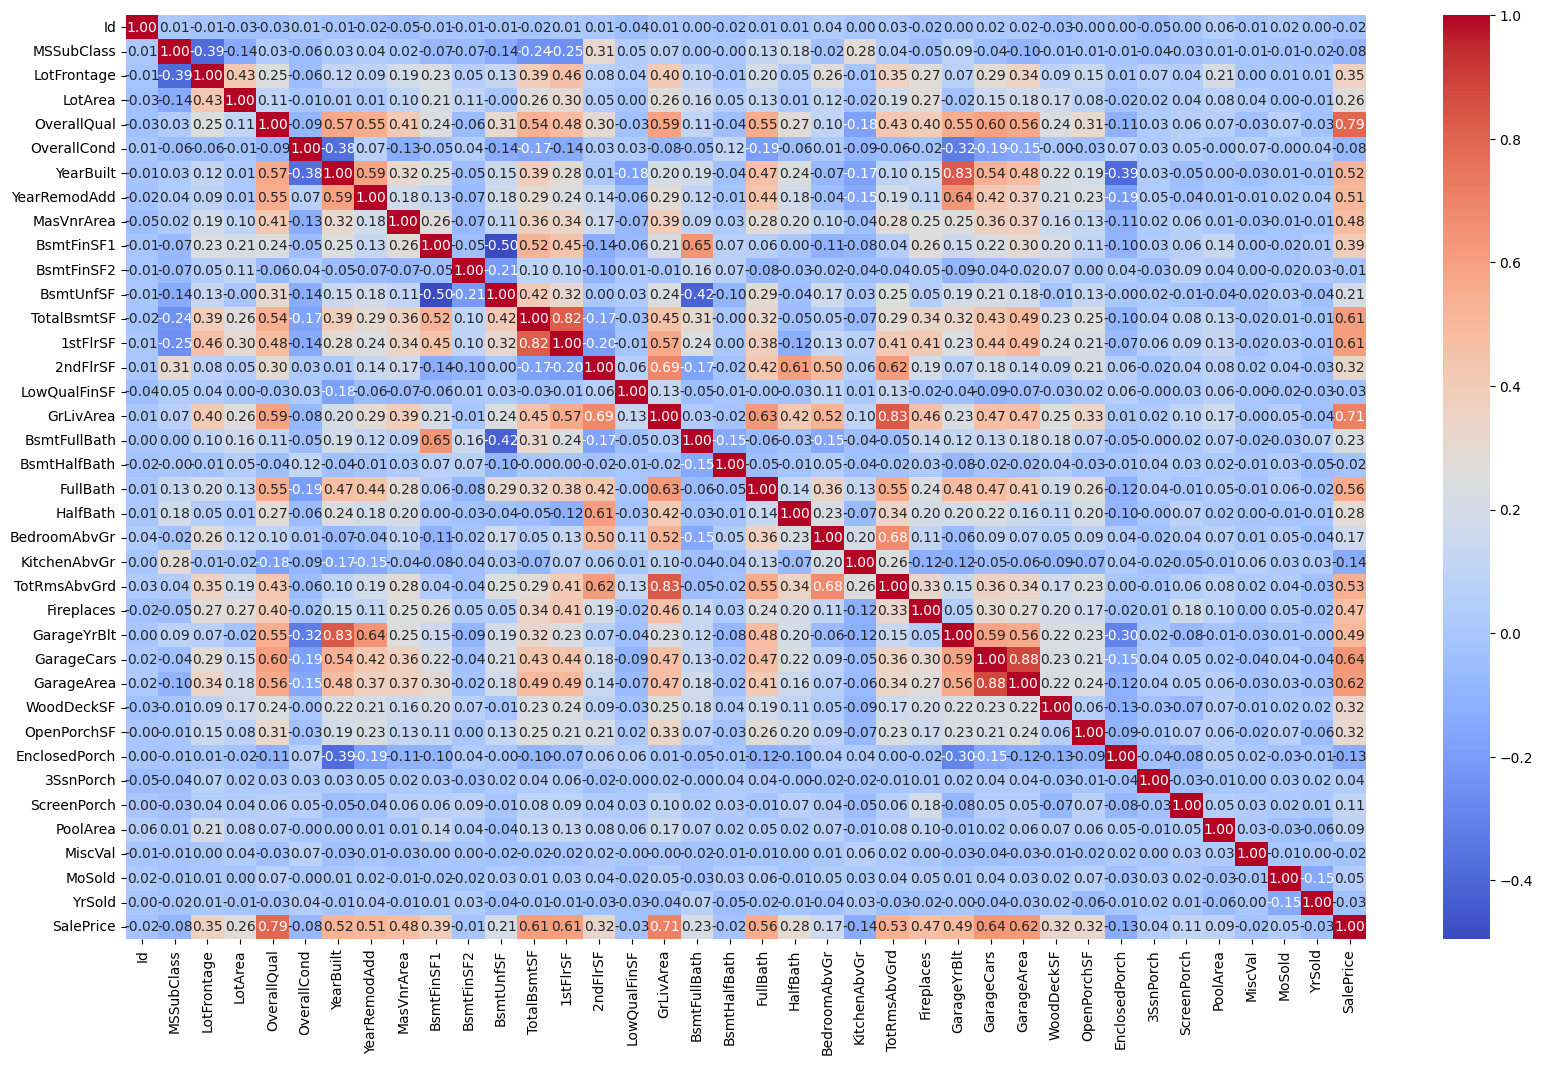

In [ ]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

Nhận thấy GarageArea và GarageCars có độ tương quan khá cao với nhau nên ta có thể loại bỏ 1 trong 2.

In [ ]:
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

Xem biểu đồ histogram của SalePrice.

<Axes: xlabel='SalePrice', ylabel='Count'>

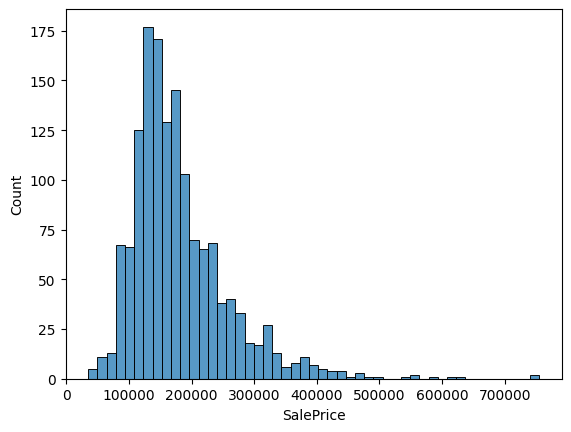

In [ ]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

Nhận thấy phân phối của SalePrice lệch -> Dùng biến đổi log để giúp phân phối trở nên chuẩn hơn,

In [ ]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

Xem lại phân phối sau khi đã biến đổi.

<Axes: xlabel='SalePrice', ylabel='Count'>

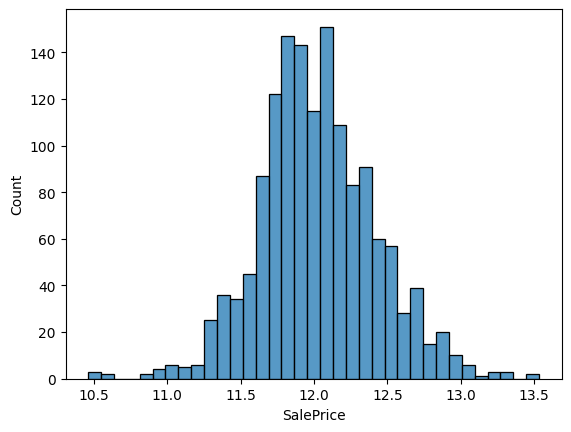

In [ ]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

Như vậy ta quan sát thấy phân phối đã đồng đều hơn.
